In [1]:
### Comparing Stocks ###
### Import dependencies ###
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

plt.style.use('bmh')
# Ignorar warings
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Get Data Frames from Yahoo! Finance ###
# yfinance is used to fetch data 
yf.pdr_override()
# Input
symbol = 'FB'
start = '2017-01-01'
end = '2020-12-31'
# Read data 
df = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
### Expected Return ###
def ExpectedReturn(df):
    return df / df.shift(1) - 1

close_px = df['Adj Close'].copy()
rets = ExpectedReturn(close_px)
rets

Date
2017-01-03         NaN
2017-01-04    0.015660
2017-01-05    0.016682
2017-01-06    0.022707
2017-01-09    0.012074
                ...   
2020-12-23    0.003819
2020-12-24   -0.002648
2020-12-28    0.035901
2020-12-29   -0.000794
2020-12-30   -0.017740
Name: Adj Close, Length: 1006, dtype: float64

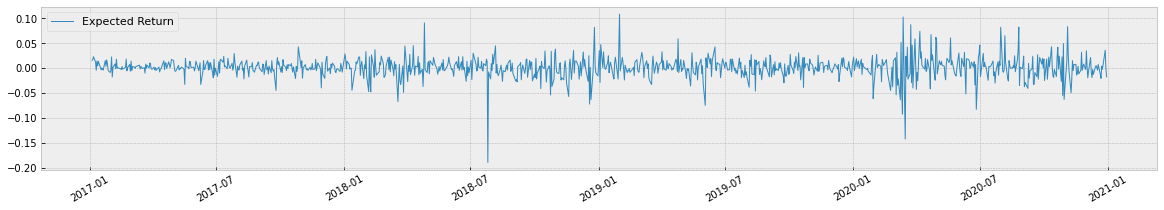

In [4]:
### Plot Expected Return ###
# Some styling
plt.figure(figsize=(20,3))
# Plot data
plt.plot(rets,lw=1, label='Expected Return')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [5]:
### Analysing Competitors Stocks ###
import pandas_datareader.data as web
# Input
start = '2017-01-01'
end = '2020-12-31'
# Read data 
df_comp = web.get_data_yahoo(['AAPL', 'FB', 'GOOG', 'IBM', 'MSFT', 'AMZN'], start, end)['Adj Close']
# Show dataFrame
df_comp

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,
2017-01-03,27.500973,753.669983,116.860001,786.140015,139.613220,58.673244
2017-01-04,27.470192,757.179993,118.690002,786.900024,141.341766,58.410725
2017-01-05,27.609884,780.450012,120.669998,794.020020,140.874130,58.410725
2017-01-06,27.917688,795.989990,123.410004,806.150024,141.567230,58.917015
2017-01-09,28.173399,796.919983,124.900002,806.650024,139.997330,58.729496
...,...,...,...,...,...,...
2020-12-23,130.960007,3185.270020,268.109985,1732.380005,123.900002,221.020004
2020-12-24,131.970001,3172.689941,267.399994,1738.849976,124.690002,222.750000
2020-12-28,136.690002,3283.959961,277.000000,1776.089966,124.820000,224.960007


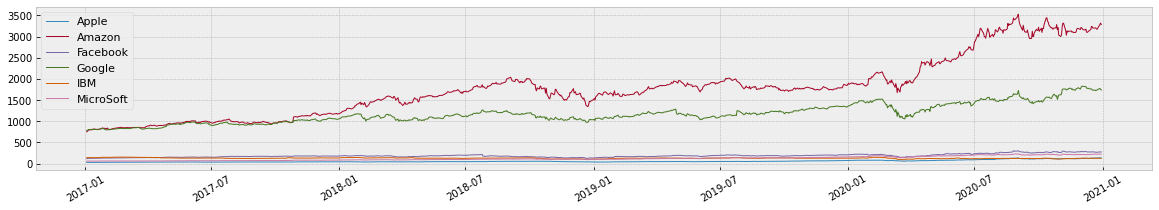

In [6]:
### Plot Analysing Competitors Stocks ###
# Some styling
plt.figure(figsize=(20,3))
# Plot data
plt.plot(df_comp['AAPL'],lw=1, label='Apple')
plt.plot(df_comp['AMZN'],lw=1, label='Amazon')
plt.plot(df_comp['FB'],lw=1, label='Facebook')
plt.plot(df_comp['GOOG'],lw=1, label='Google')
plt.plot(df_comp['IBM'],lw=1, label='IBM')
plt.plot(df_comp['MSFT'],lw=1, label='MicroSoft')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

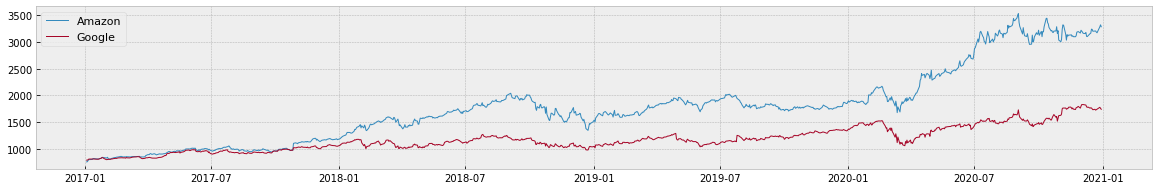

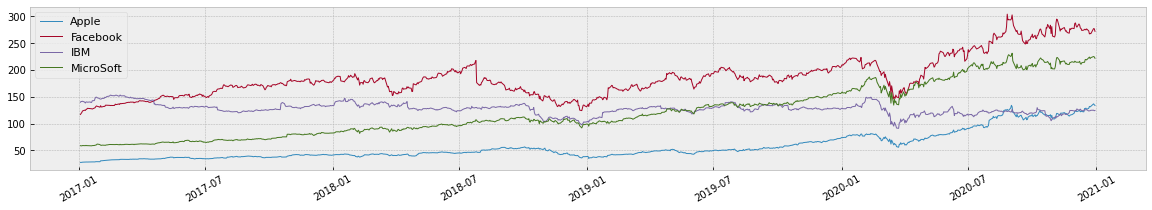

In [7]:
### Plot Analysing Competitors Stocks (Splited) ###
# Some styling
plt.figure(figsize=(20,3))
plt.plot(df_comp['AMZN'],lw=1, label='Amazon')
plt.plot(df_comp['GOOG'],lw=1, label='Google')
plt.legend(loc=2,prop={'size':11})
# Plot data
plt.figure(figsize=(20,3))
plt.plot(df_comp['AAPL'],lw=1, label='Apple')
plt.plot(df_comp['FB'],lw=1, label='Facebook')
plt.plot(df_comp['IBM'],lw=1, label='IBM')
plt.plot(df_comp['MSFT'],lw=1, label='MicroSoft')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [8]:
### Correlation Analysis ###
rets_comp = df_comp.pct_change()
corr = rets_comp.corr()
# Show dataFrame
corr

,AAPL,AMZN,FB,GOOG,IBM,MSFT
AAPL,1.000000,0.640099,0.615644,0.679506,0.492096,0.745658
AMZN,0.640099,1.000000,0.631663,0.682847,0.384571,0.722520
FB,0.615644,0.631663,1.000000,0.701704,0.379263,0.651039
GOOG,0.679506,0.682847,0.701704,1.000000,0.540835,0.789347
IBM,0.492096,0.384571,0.379263,0.540835,1.000000,0.571956
MSFT,0.745658,0.722520,0.651039,0.789347,0.571956,1.000000


In [9]:
### Heat map Competitors Stocks by sector ###
# Correlation Analysis
df_comp = web.get_data_yahoo(['FB', 'GOOG', 'DIS', 'NFLX', 'AMZN', 'GM', 'F', 'GE', 'EBAY', 'AAPL', 'MSFT', 'NVDA', 'JPM', 'BAC', 'MA', 'IBM'], start, end)['Adj Close']

# Correlation Analysis
rets_comp = df_comp.pct_change()
corr = rets_comp.corr()
# Show dataFrame
corr

[*********************100%***********************]  16 of 16 completed


,AAPL,AMZN,BAC,DIS,EBAY,F,FB,GE,GM,GOOG,IBM,JPM,MA,MSFT,NFLX,NVDA
AAPL,1.000000,0.640099,0.500504,0.450479,0.444050,0.357856,0.615644,0.336930,0.392630,0.679506,0.492096,0.489161,0.653302,0.745658,0.490755,0.616267
AMZN,0.640099,1.000000,0.319960,0.319920,0.402936,0.202581,0.631663,0.201693,0.236024,0.682847,0.384571,0.293243,0.544224,0.722520,0.638430,0.584572
BAC,0.500504,0.319960,1.000000,0.611860,0.337060,0.637537,0.398457,0.573289,0.657049,0.523874,0.622655,0.936074,0.633332,0.540687,0.248123,0.416761
DIS,0.450479,0.319920,0.611860,1.000000,0.277528,0.520320,0.387243,0.436686,0.522142,0.502355,0.528455,0.633498,0.609015,0.497566,0.238842,0.344161
EBAY,0.444050,0.402936,0.337060,0.277528,1.000000,0.291360,0.357476,0.217931,0.282801,0.420245,0.354430,0.326236,0.431837,0.488173,0.360847,0.413933
F,0.357856,0.202581,0.637537,0.520320,0.291360,1.000000,0.345241,0.540543,0.737184,0.371710,0.502845,0.646200,0.521169,0.368263,0.140393,0.328303
FB,0.615644,0.631663,0.398457,0.387243,0.357476,0.345241,1.000000,0.279726,0.388244,0.701704,0.379263,0.389326,0.595081,0.651039,0.504900,0.557551
GE,0.336930,0.201693,0.573289,0.436686,0.217931,0.540543,0.279726,1.000000,0.514485,0.345291,0.512329,0.572995,0.435733,0.342254,0.167580,0.291820
GM,0.392630,0.236024,0.657049,0.522142,0.282801,0.737184,0.388244,0.514485,1.000000,0.446772,0.537333,0.659089,0.536749,0.419947,0.211546,0.374322
GOOG,0.679506,0.682847,0.523874,0.502355,0.420245,0.371710,0.701704,0.345291,0.446772,1.000000,0.540835,0.520356,0.698997,0.789347,0.538873,0.616510


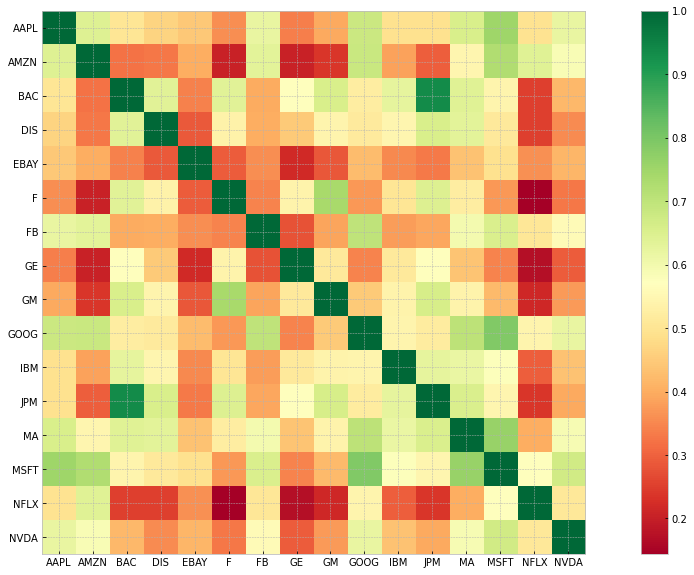

In [31]:
### Plot Correlation Analysis heatmap ###
plt.figure(figsize=(20,10))

# Correlation
plt.imshow(corr, cmap='RdYlGn', interpolation='none')
# Plot
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
# Show Schema
plt.show()


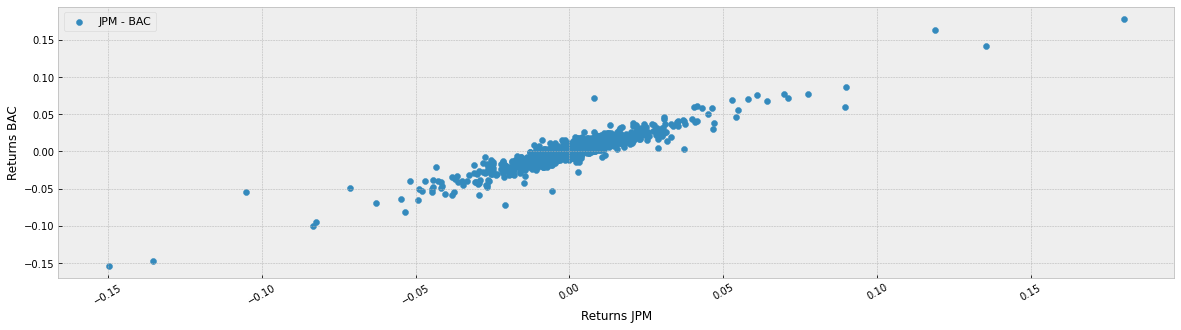

In [10]:
### Plot SCATTER (JPM - BAC) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.scatter(rets_comp['JPM'],rets_comp['BAC'], label='JPM - BAC')
plt.xlabel('Returns JPM')
plt.ylabel('Returns BAC')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

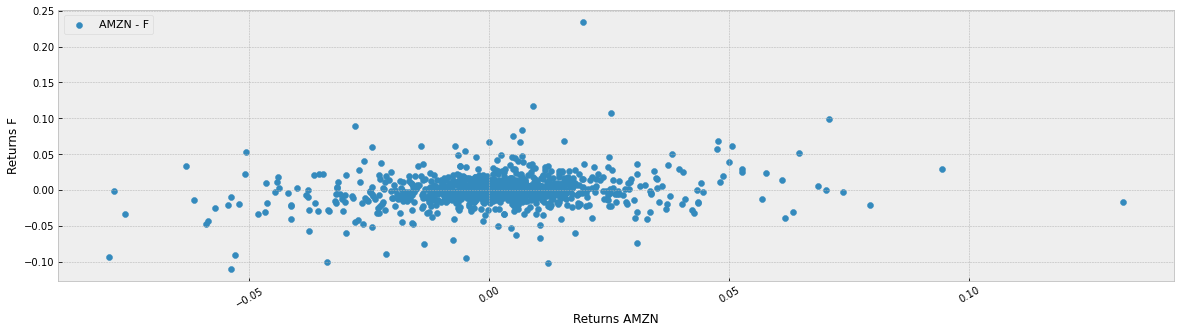

In [11]:
### Plot SCATTER (AMZN - F) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.scatter(rets_comp['AMZN'],rets_comp['F'], label='AMZN - F')
plt.xlabel('Returns AMZN')
plt.ylabel('Returns F')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show dataFrame
plt.show()

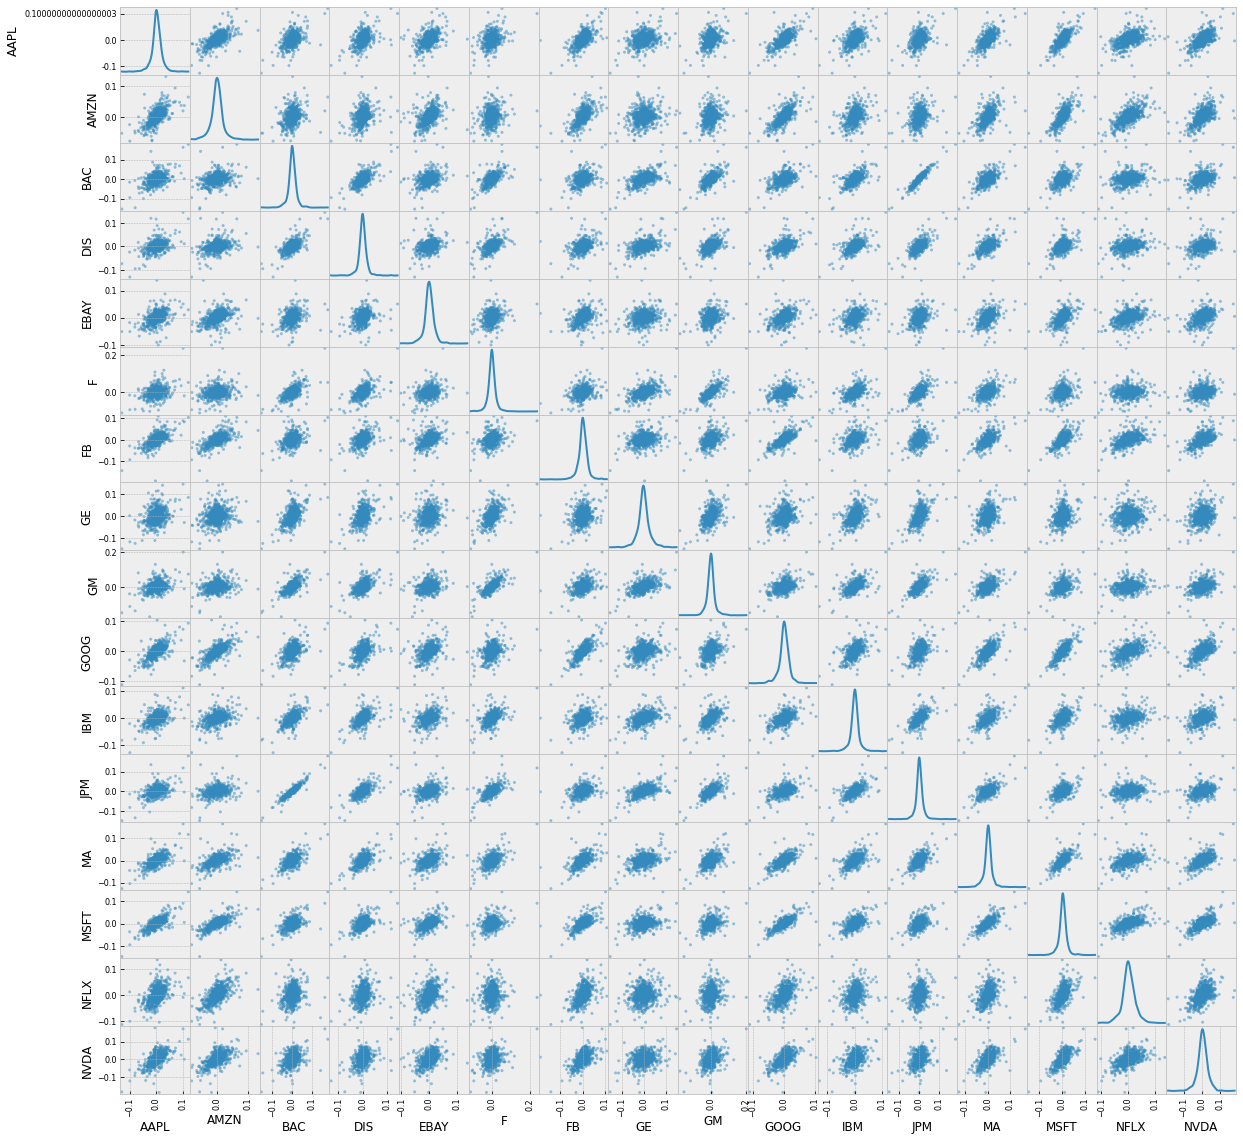

In [34]:
### Plot SCATTER portfolio ###
pd.plotting.scatter_matrix(rets_comp,diagonal='kde', figsize=(20,20))
# Show Scatter Chart
plt.show()

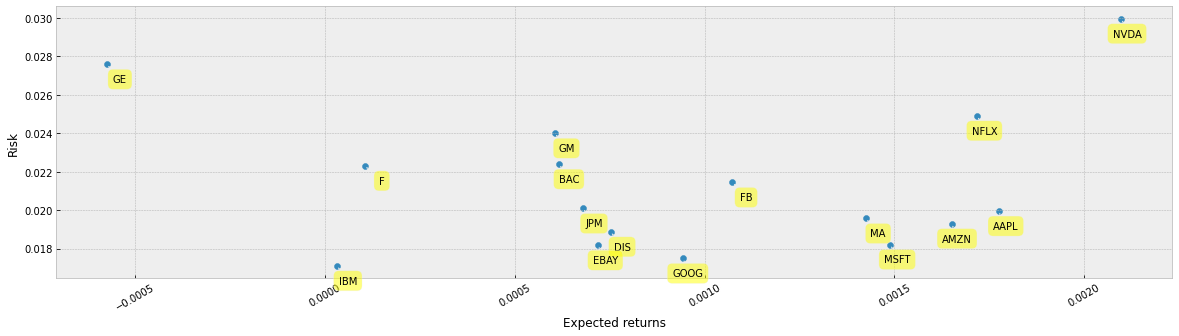

In [12]:
### Plot Risk scatter ###
plt.figure(figsize=(20,5))
plt.scatter(rets_comp.mean(), rets_comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.setp(plt.gca().get_xticklabels(), rotation=30)
for label, x, y in zip(rets_comp.columns, rets_comp.mean(), rets_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

In [13]:
### Calculate Daily Percentage Change ###
change_df = df.copy()

change_df['PercentChange']=change_df['Adj Close'].pct_change()
# Show the dataFrame
change_df

,Open,High,Low,Close,Adj Close,Volume,PercentChange
Date,,,,,,,
2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900,NaN
2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900,0.015660
2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200,0.016682
2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300,0.022707
2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400,0.012074
...,...,...,...,...,...,...,...
2020-12-23,266.890015,272.170013,266.230011,268.109985,268.109985,14329000,0.003819
2020-12-24,268.880005,270.399994,266.200012,267.399994,267.399994,6702000,-0.002648
2020-12-28,268.739990,277.299988,265.660004,277.000000,277.000000,23299700,0.035901


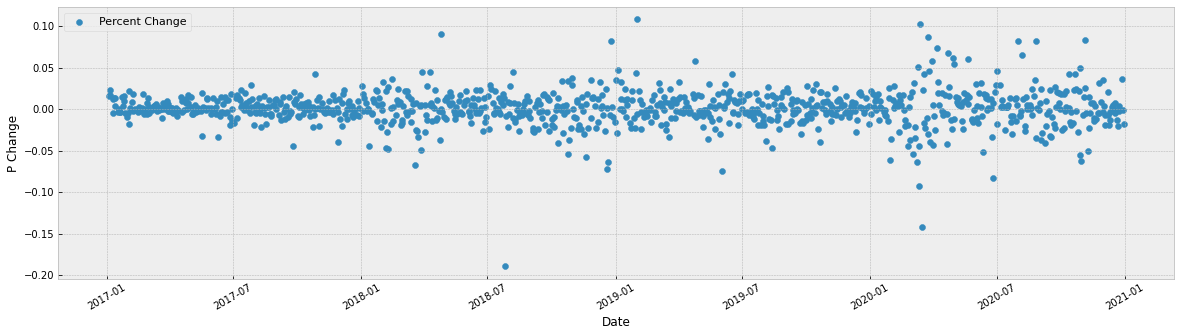

In [14]:
### Plot Calculate Daily Percentage Change ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.scatter(change_df.index,change_df['PercentChange'], label='Percent Change')
plt.xlabel('Date')
plt.ylabel('P Change')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

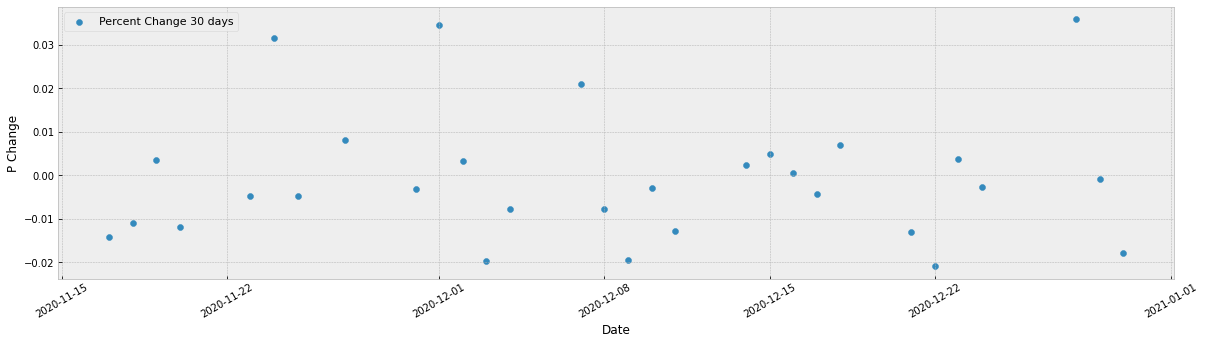

In [16]:
### Plot Calculate Daily Percentage Change (last 30 days) ###
short = change_df.tail(30).copy()
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.scatter(short.index,short['PercentChange'], label='Percent Change 30 days')
plt.xlabel('Date')
plt.ylabel('P Change')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

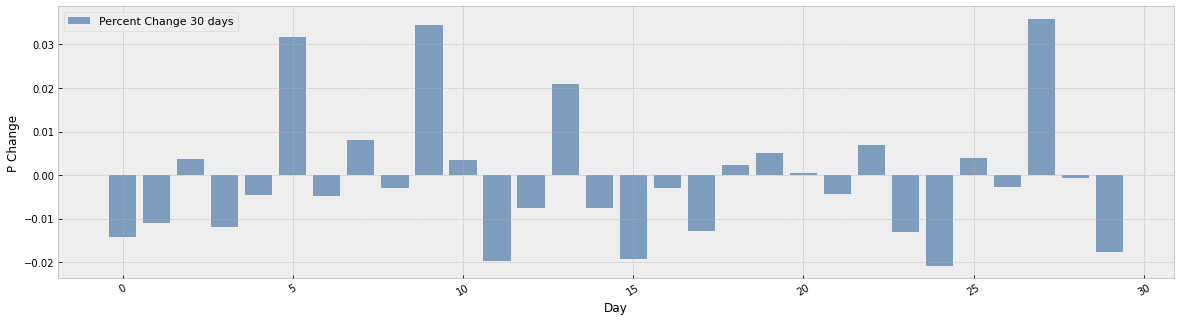

In [17]:
### Plot Bars - Calculate Daily Percentage Change (last 30 days) ###
short = change_df.tail(30).copy()
# Some styling
plt.style.use('bmh')
plt.figure(figsize=(20,5))
# Basic plot
height = short['PercentChange']
bars = short.index
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6), label='Percent Change 30 days')

plt.xlabel('Day')
plt.ylabel('P Change')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Cart
plt.show()
